In [214]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive
root = '/gdrive/My Drive/Wtech/Project_1/'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
from scipy.stats.mstats import winsorize
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


#1.Data

In [168]:
train_set = pd.read_csv(root+"master.csv")

In [169]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [170]:
train_set.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [171]:
train_set.nunique()

country                 101
year                     32
sex                       2
age                       6
suicides_no            2084
population            25564
suicides/100k pop      5298
country-year           2321
HDI for year            305
 gdp_for_year ($)      2321
gdp_per_capita ($)     2233
generation                6
dtype: int64

Target value is "suicides/100k pop".

# 2.Data Cleaning


## Missing Values(Case 1)(Mean Value)

In [172]:
train_set.isnull().sum()*100/train_set.shape[0]

country                0.000000
year                   0.000000
sex                    0.000000
age                    0.000000
suicides_no            0.000000
population             0.000000
suicides/100k pop      0.000000
country-year           0.000000
HDI for year          69.935298
 gdp_for_year ($)      0.000000
gdp_per_capita ($)     0.000000
generation             0.000000
dtype: float64

In [173]:
train_set.fillna(train_set.groupby('country').transform('mean'), inplace=True)
train_set["HDI for year"].fillna(train_set["HDI for year"].mean(), inplace=True)

In [174]:
train_set.isnull().sum()*100/train_set.shape[0]

country               0.0
year                  0.0
sex                   0.0
age                   0.0
suicides_no           0.0
population            0.0
suicides/100k pop     0.0
country-year          0.0
HDI for year          0.0
 gdp_for_year ($)     0.0
gdp_per_capita ($)    0.0
generation            0.0
dtype: float64

## Missing Values(Case 2) (Drop HDI for year column)

In [175]:
train_set_2 = train_set.drop("HDI for year",axis=1)

## To_Numeric işlemi

In [176]:
train_set[" gdp_for_year ($) "] = train_set[" gdp_for_year ($) "].str.replace(",","")
train_set["gdp_for_year ($)"] = pd.to_numeric(train_set[" gdp_for_year ($) "])
train_set.drop(" gdp_for_year ($) ", axis=1, inplace=True)

In [177]:
for i in ["year","suicides_no","population","suicides/100k pop","HDI for year","gdp_per_capita ($)", "gdp_for_year ($)"]:
    print("{} sütunu için problemli değerler : ".format(i))
    hatali_degerler = []
    for deger in train_set[i]:
        try:
            float(deger)
        except:
            hatali_degerler.append(deger)
    print(set(hatali_degerler)) #Nümerik verilerde hatali değer yoktur.

year sütunu için problemli değerler : 
set()
suicides_no sütunu için problemli değerler : 
set()
population sütunu için problemli değerler : 
set()
suicides/100k pop sütunu için problemli değerler : 
set()
HDI for year sütunu için problemli değerler : 
set()
gdp_per_capita ($) sütunu için problemli değerler : 
set()
gdp_for_year ($) sütunu için problemli değerler : 
set()


## Outlayer (Box Plot)

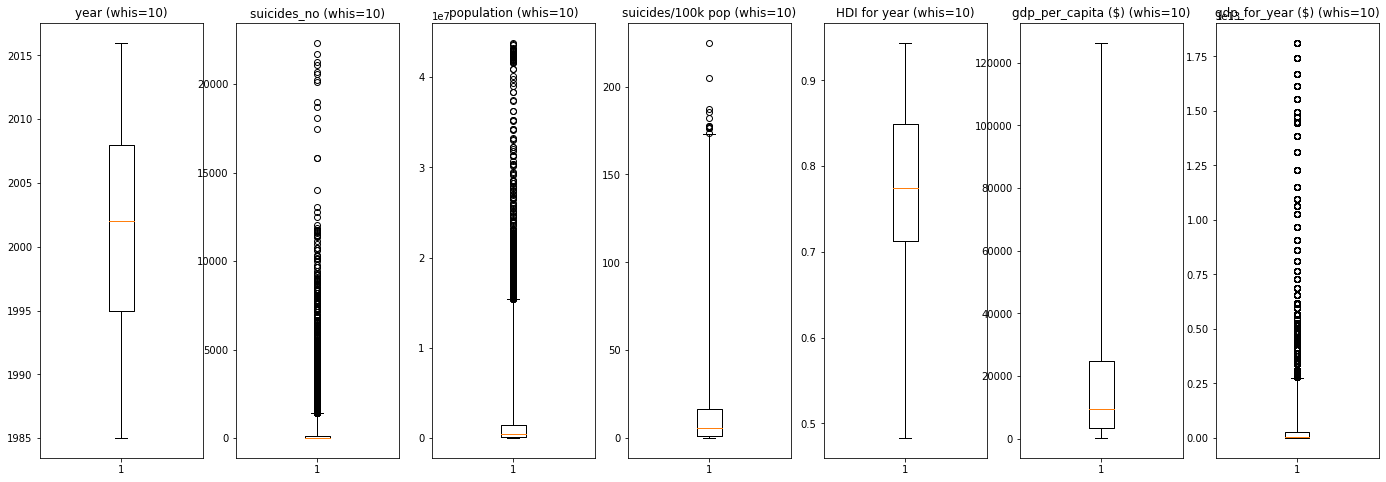

In [178]:
plt.figure(figsize=(24,8))
count = 0
for i in ["year","suicides_no","population","suicides/100k pop","HDI for year","gdp_per_capita ($)", "gdp_for_year ($)"]:
  count+=1
  plt.subplot(1,7,count)
  plt.boxplot(train_set[i], whis=10)
  plt.title(f"{i} (whis=10)")

plt.show()
#suicides/100k pop, suicides_no ve population verilerinde kutu grafiğine göre aykırı değer bulunmaktadır. Fakat bu veriler bazı ülkelerinin nüfusunun fazla veya bazılarının çok az olmasından dolayı aykırı olarak gözükmektedir. Aslında aykırı değer yoktur.

## Outlayer(Z-score)

In [179]:
for i in ["year","suicides_no","population","suicides/100k pop","HDI for year","gdp_per_capita ($)", "gdp_for_year ($)"]:
  z_scores = zscore(train_set[i])
  print(f"{i} için Z score sonucu\n")
  for threshold in range(5,10):
    print("Eşik değeri: {}".format(threshold))
    print("Aykırı değerlerin sayısı: {}".format(len((np.where(z_scores > threshold)[0]))))
    print('------')
  print("------------------------------------------------------------------------")
  #gdp_for_year ($), suicides/100k pop, suicides_no ve population verilerinde z score'a göre aykırı değer bulunmaktadır. Fakat bu veriler bazı ülkelerinin nüfusunun çok fazla veya bazılarının çok az olmasından dolayı aykırı olarak gözükmektedir. Aslında aykırı değer yoktur.

year için Z score sonucu

Eşik değeri: 5
Aykırı değerlerin sayısı: 0
------
Eşik değeri: 6
Aykırı değerlerin sayısı: 0
------
Eşik değeri: 7
Aykırı değerlerin sayısı: 0
------
Eşik değeri: 8
Aykırı değerlerin sayısı: 0
------
Eşik değeri: 9
Aykırı değerlerin sayısı: 0
------
------------------------------------------------------------------------
suicides_no için Z score sonucu

Eşik değeri: 5
Aykırı değerlerin sayısı: 221
------
Eşik değeri: 6
Aykırı değerlerin sayısı: 162
------
Eşik değeri: 7
Aykırı değerlerin sayısı: 134
------
Eşik değeri: 8
Aykırı değerlerin sayısı: 108
------
Eşik değeri: 9
Aykırı değerlerin sayısı: 69
------
------------------------------------------------------------------------
population için Z score sonucu

Eşik değeri: 5
Aykırı değerlerin sayısı: 173
------
Eşik değeri: 6
Aykırı değerlerin sayısı: 92
------
Eşik değeri: 7
Aykırı değerlerin sayısı: 67
------
Eşik değeri: 8
Aykırı değerlerin sayısı: 51
------
Eşik değeri: 9
Aykırı değerlerin sayısı: 41
-----

## Outlayer (Winsorize)

Outlayer olarak gözüken ama olmayan gdp_for_year ($), suicides_no ve population daha sonraki aşamalarda drop edileceği için onlara dokunulmadı. Sadece Suicides/100k pop değerine winsorize işlemi yapılacak.

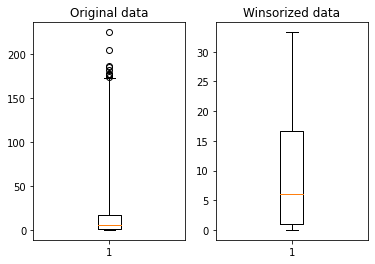

In [180]:
winsorized_suicides_pop = winsorize(train_set["suicides/100k pop"], (0, 0.1))
plt.subplot(1,2,1)
plt.title("Original data")
plt.boxplot(train_set["suicides/100k pop"], whis=10)
plt.subplot(1,2,2)
plt.title("Winsorized data")
plt.boxplot(winsorized_suicides_pop, whis=10)
# Aykırılık giderildi.
train_set["winsorize_suicide_pop"] = winsorized_suicides_pop
train_set.drop(["suicides/100k pop"], axis=1, inplace=True)

# 3.Data Exploration

##One Variable Analysis

In [181]:
train_set.describe()

,year,suicides_no,population,HDI for year,gdp_per_capita ($),gdp_for_year ($),winsorize_suicide_pop
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000,2.782000e+04,27820.000000
mean,2001.258375,242.574407,1.844794e+06,0.774271,16866.464414,4.455810e+11,10.284502
std,8.469055,902.047917,3.911779e+06,0.085048,18887.576472,1.453610e+12,11.098512
min,1985.000000,0.000000,2.780000e+02,0.483000,251.000000,4.691962e+07,0.000000
25%,1995.000000,3.000000,9.749850e+04,0.713200,3447.000000,8.985353e+09,0.920000
50%,2002.000000,25.000000,4.301500e+05,0.774271,9372.000000,4.811469e+10,5.990000
75%,2008.000000,131.000000,1.486143e+06,0.849000,24874.000000,2.602024e+11,16.620000
max,2016.000000,22338.000000,4.380521e+07,0.944000,126352.000000,1.812071e+13,33.290000


In [182]:
train_set.describe(include=['O']) # Categorical Data

,country,sex,age,country-year,generation
count,27820,27820,27820,27820,27820
unique,101,2,6,2321,6
top,Mauritius,female,75+ years,Australia1987,Generation X
freq,382,13910,4642,12,6408


### Continous Variable Visualization

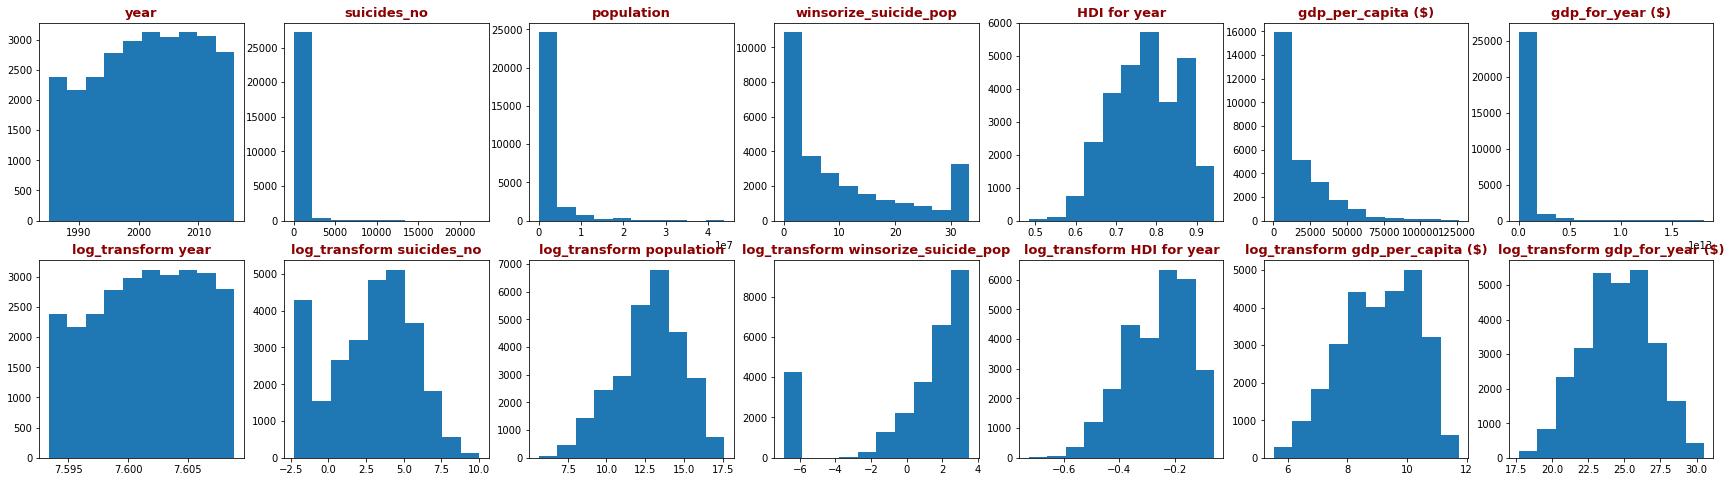

In [183]:
plt.figure(figsize=(30,8))
baslik_font = {'family': 'arial', 'color': 'darkred','weight': 'bold','size': 13 }
eksen_font  = {'family': 'arial', 'color': 'darkblue','weight': 'bold','size': 10 }

degiskenler = ["year","suicides_no","population","winsorize_suicide_pop","HDI for year","gdp_per_capita ($)", "gdp_for_year ($)"]

for i in range(7):
    plt.subplot(2, 7, i+1)
    plt.hist(train_set[degiskenler[i]])
    plt.title(degiskenler[i], fontdict=baslik_font)

train_set["suicides_no"] = np.where(train_set["suicides_no"] < 1, 0.1, train_set["suicides_no"])
train_set["winsorize_suicide_pop"] = np.where(train_set["winsorize_suicide_pop"] < 0.01, 0.001, train_set["winsorize_suicide_pop"])

for i in range(7):
    plt.subplot(2, 7, i+8)
    plt.hist(np.log(train_set[degiskenler[i]]))
    plt.title(f"log_transform {degiskenler[i]}", fontdict=baslik_font)


### Categorical Variable Visualization

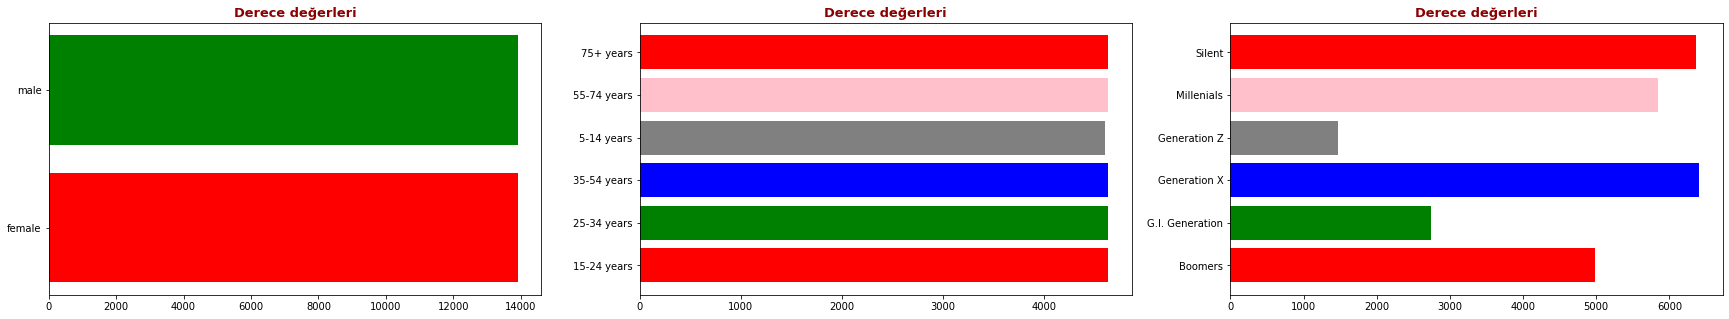

In [184]:
plt.figure(figsize=(30,5))
categorical_variables = ["sex", "age", "generation"]
for i in range(3):
  plt.subplot(1, 3, i+1)
  plt.barh(train_set.groupby(categorical_variables[i])[categorical_variables[i]].count().index, 
      train_set.groupby(categorical_variables[i])[categorical_variables[i]].count(), 
      color=["red","green","blue","grey","pink"])
  plt.title("Derece değerleri", fontdict=baslik_font)


## Multi Variable Analysis

### Two Continunous Correlation 

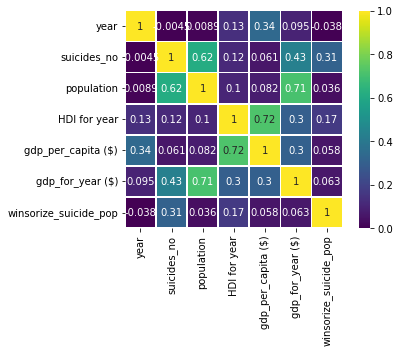

In [185]:
korelasyon_degiskenler = train_set.corr()

sns.heatmap(korelasyon_degiskenler, square=True, annot=True, linewidths=.5, vmin=0, vmax=1, cmap='viridis')

### Continuous-Categorical Analysis (Target variable is suicide_rate)

In [186]:
categorical_variables = ["country", "country-year", "sex", "age", "generation"]
for i in range(5):
  print(train_set.groupby(categorical_variables[i]).mean()["winsorize_suicide_pop"])

country
Albania                  3.503098
Antigua and Barbuda      0.553870
Argentina                9.664382
Armenia                  3.276027
Aruba                    6.231286
                          ...    
United Arab Emirates     1.318264
United Kingdom           7.502481
United States           12.878091
Uruguay                 14.668393
Uzbekistan               8.099129
Name: winsorize_suicide_pop, Length: 101, dtype: float64
country-year
Albania1987       2.654417
Albania1988       2.705167
Albania1989       2.783583
Albania1992       1.500333
Albania1993       2.713417
                    ...   
Uzbekistan2010    5.269167
Uzbekistan2011    5.595000
Uzbekistan2012    6.460833
Uzbekistan2013    6.571667
Uzbekistan2014    7.093333
Name: winsorize_suicide_pop, Length: 2321, dtype: float64
sex
female     5.253945
male      15.315366
Name: winsorize_suicide_pop, dtype: float64
age
15-24 years     8.637010
25-34 years    10.914149
35-54 years    12.592822
5-14 years      0.620360
5

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Generation with suicide rate')

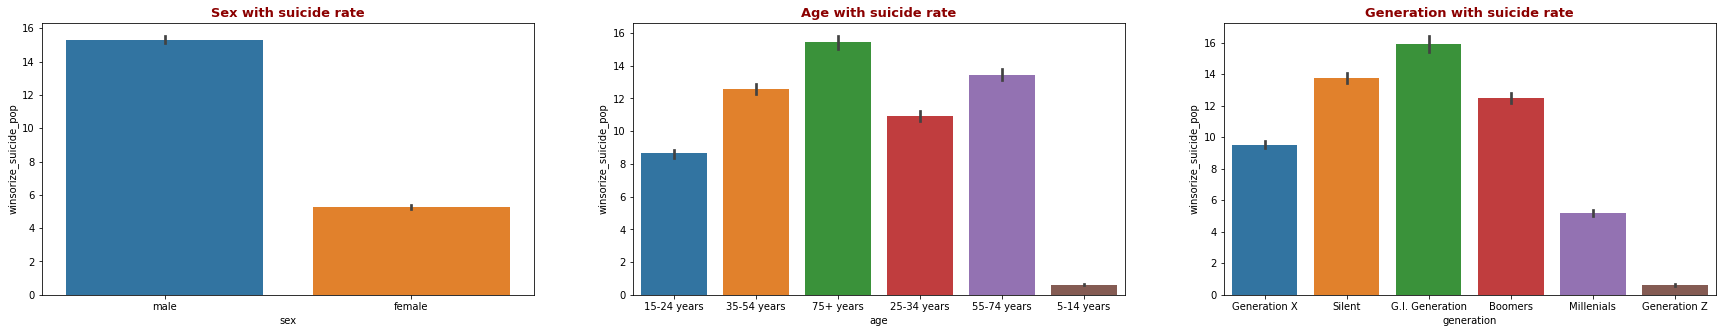

In [187]:
plt.figure(figsize=(30,5))

plt.subplot(1,3,1)
sns.barplot(train_set["sex"], train_set["winsorize_suicide_pop"])
plt.title("Sex with suicide rate", fontdict = baslik_font)

plt.subplot(1,3,2)
sns.barplot(train_set["age"], train_set["winsorize_suicide_pop"])
plt.title("Age with suicide rate", fontdict = baslik_font)

plt.subplot(1,3,3)
# draw the heatmap using seaborn.
sns.barplot(train_set["generation"], train_set["winsorize_suicide_pop"])
plt.title("Generation with suicide rate", fontdict = baslik_font)

# 4.Feature Engineering

## Categorical Data to Numerical Value

In [188]:
new_train_set = pd.get_dummies(train_set, columns=['sex'], drop_first=True)
new_train_set = pd.get_dummies(new_train_set, columns=["age", "country", "generation"])
new_train_set

,year,suicides_no,population,country-year,HDI for year,gdp_per_capita ($),gdp_for_year ($),winsorize_suicide_pop,sex_male,age_15-24 years,age_25-34 years,age_35-54 years,age_5-14 years,age_55-74 years,age_75+ years,country_Albania,country_Antigua and Barbuda,country_Argentina,country_Armenia,country_Aruba,country_Australia,country_Austria,country_Azerbaijan,country_Bahamas,country_Bahrain,country_Barbados,country_Belarus,country_Belgium,country_Belize,country_Bosnia and Herzegovina,country_Brazil,country_Bulgaria,country_Cabo Verde,country_Canada,country_Chile,country_Colombia,country_Costa Rica,country_Croatia,country_Cuba,country_Cyprus,...,country_Paraguay,country_Philippines,country_Poland,country_Portugal,country_Puerto Rico,country_Qatar,country_Republic of Korea,country_Romania,country_Russian Federation,country_Saint Kitts and Nevis,country_Saint Lucia,country_Saint Vincent and Grenadines,country_San Marino,country_Serbia,country_Seychelles,country_Singapore,country_Slovakia,country_Slovenia,country_South Africa,country_Spain,country_Sri Lanka,country_Suriname,country_Sweden,country_Switzerland,country_Thailand,country_Trinidad and Tobago,country_Turkey,country_Turkmenistan,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States,country_Uruguay,country_Uzbekistan,generation_Boomers,generation_G.I. Generation,generation_Generation X,generation_Generation Z,generation_Millenials,generation_Silent
0,1987,21.0,312900,Albania1987,0.673,796,2156624900,6.71,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,1987,16.0,308000,Albania1987,0.673,796,2156624900,5.19,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1987,14.0,289700,Albania1987,0.673,796,2156624900,4.83,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1987,1.0,21800,Albania1987,0.673,796,2156624900,4.59,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,1987,9.0,274300,Albania1987,0.673,796,2156624900,3.28,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27815,2014,107.0,3620833,Uzbekistan2014,0.675,2309,63067077179,2.96,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
27816,2014,9.0,348465,Uzbekistan2014,0.675,2309,63067077179,2.58,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
27817,2014,60.0,2762158,Uzbekistan2014,0.675,2309,63067077179,2.17,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
27818,2014,44.0,2631600,Uzbekistan2014,0.675,2309,63067077179,1.67,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


## Convert to Gaussian Distribution

In [189]:
degiskenler = ["year","suicides_no","population","winsorize_suicide_pop","HDI for year","gdp_per_capita ($)", "gdp_for_year ($)"]
for i in range(7):
  new_train_set[degiskenler[i]] = np.log(train_set[degiskenler[i]])
train_set_log = new_train_set.copy()

##Scaling

### Data Standard_Scaling(Case 1)

In [190]:
degiskenler = ["year","suicides_no","population","winsorize_suicide_pop","HDI for year","gdp_per_capita ($)", "gdp_for_year ($)"]
sc = StandardScaler()
for i in range(7):
  new_train_set[degiskenler[i]] = sc.fit_transform(new_train_set[[degiskenler[i]]])

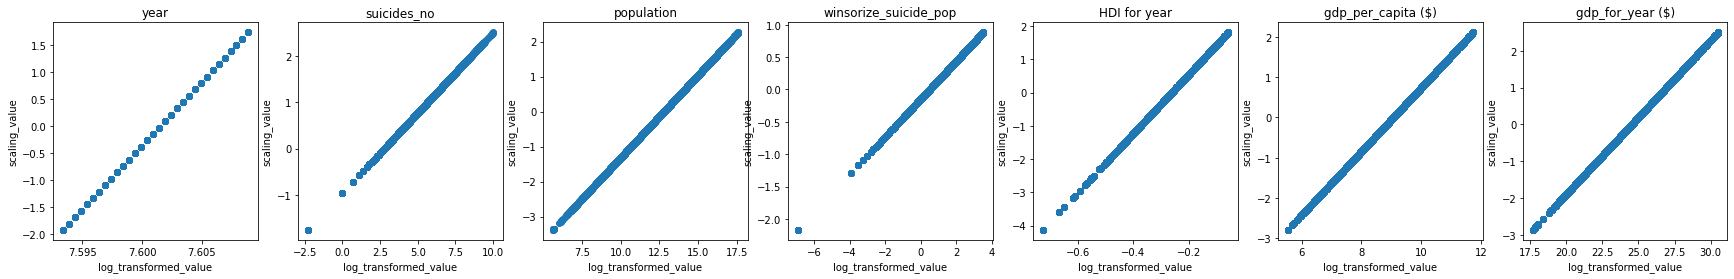

In [191]:
plt.figure(figsize=(30,4))
for i in range(7):
    plt.subplot(1, 7, i+1)
    plt.scatter(train_set_log[degiskenler[i]], new_train_set[degiskenler[i]])
    plt.title(degiskenler[i])
    plt.xlabel("log_transformed_value")
    plt.ylabel("scaling_value")

### Data Normalization(Case 2)

In [192]:
degiskenler = ["year","suicides_no","population","winsorize_suicide_pop","HDI for year","gdp_per_capita ($)", "gdp_for_year ($)"]
sc = MinMaxScaler()
for i in range(7):
  new_train_set[degiskenler[i]] = sc.fit_transform(new_train_set[[degiskenler[i]]])

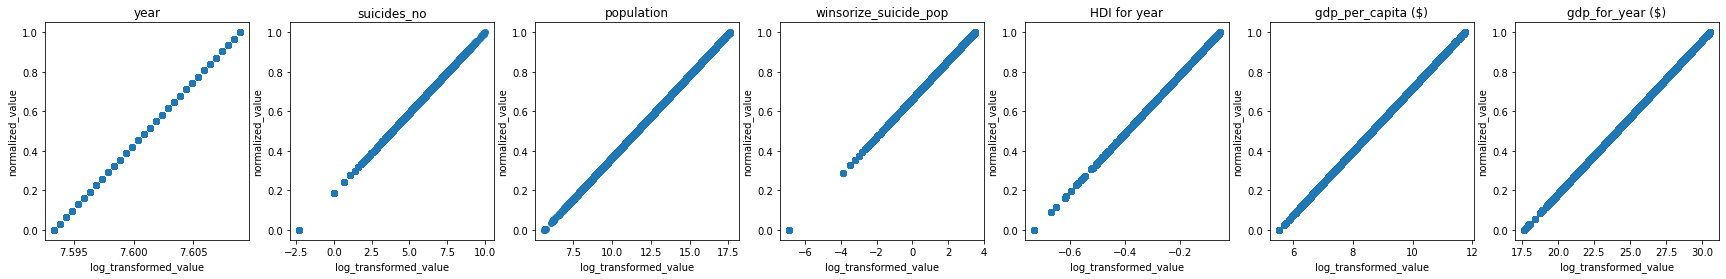

In [193]:
plt.figure(figsize=(30,4))
for i in range(7):
    plt.subplot(1, 7, i+1)
    plt.scatter(train_set_log[degiskenler[i]], new_train_set[degiskenler[i]])
    plt.title(degiskenler[i])
    plt.xlabel("log_transformed_value")
    plt.ylabel("normalized_value")

## Gereksiz Özelliklerin çıkartılması

"country-year" kolonundaki veriler diğer kolonlarda yer aldığından drop edildi.

In [194]:
new_train_set = new_train_set.drop("country-year", axis=1)

"suicides_no" ve "population" kolonlarındaki veriler "suicides/100k pop" kolonunda işlendiği için bu iki kolon gereksizdir. country-year veriside year ve country kolonlarından işlendiği için daha önceden çıkartılmıştı.

In [195]:
new_train_set.drop(["suicides_no","population"],axis=1, inplace=True)

"gdp_for_year ($)" kolonu "gdp_ per_capita " kolonunda işlendiği için gereksizdir. 

In [196]:
new_train_set.drop("gdp_for_year ($)",axis=1, inplace=True)

##PCA

In [225]:
new_train_set_x = new_train_set.drop("winsorize_suicide_pop", axis=1)
pca = PCA(.95)
pca.fit(new_train_set_x)
new_train_set_x = pca.transform(new_train_set_x)

In [228]:
pca.n_components_ 

82

#5.Conclusion

(1.Data)Veri setini yükledikten sonra ilk olarak veri setinin genel yapısı incelenmiştir.


(2.Missing Values) Veri setinde sadece tek kolonda eksik veri bulunmaktadır. Eksik veriyi gidermek için 2 case seçilmiştir. 1. Casede ülkelere göre ortalama değer alınıp yazıldı. Bulunmayan değerler içinse genel ortalama alınıp yerlerine yazıldı. 2.casede tüm sütun drop edildi. Bu sütun sonuçla koreaslasyonda olduğundan drop edilmemeli. 1.Case seçilir.

Box-plot ve Z score'a göre outlayera bakılmıştır. Outlayerı gidermek için sadece suicide rate değişkenine winsorize uygulanmıştır.


(3.Data Exploration) Tek değişkenli ve çok değişkenli analiz yapılmıştır. Korealasyon matrisi oluşturulup hedef değişkenimiz ile korele olan sürekli değişkenler görülmüştür. Kategorik Değişkenlerde ise barplot kullanılarak korealasyon görülmüştür.


(4.Feature Engineering) Kategorik veriler encode edildi. Verileri normal dağılıma çevirmek için log transform uygulandı. Verilerin ölçeklenmesi aşamasında hem standard scaling hemde normalization farklı caselerde denendi. Son aşama olarak Gereksiz özellikler çıkartıldı.
- "country-year" kolonundaki veriler diğer kolonlarda yer aldığından drop edildi.
- "suicides_no" ve "population" kolonlarındaki veriler "suicides/100k pop" kolonunda işlendiği için bu iki kolon gereksizdir. country-year veriside year ve country kolonlarından işlendiği için daha önceden çıkartılmıştı.
- "gdp_for_year ($)" kolonu "gdp_ per_capita " kolonunda işlendiği için gereksizdir.

Bunların sonucunda 118 tane kolon bulundu. Bunların sayısınıda indirmemiz gerekiyor bunun için de PCA kullanıldı. Yüzde 95 varyansla PCA uygulandı. Sonuç olarak da verimizi 82 kolona indirgedik.